In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(16,6)}, style="whitegrid")

In [2]:
data = pd.read_excel('data.xlsx', sheet_name='Sheet1')

In [3]:
pd.options.display.float_format ='{:,.3f}'.format

In [4]:
data.rename(columns={'ИД КЛИЕНТА': 'customer_id','РАЙОН':'region','ГОРОД':'city','ДАТА ЗАКЛЮЧЕНИЯ ДОГОВОРА':'date_conclusion',
                 'ТЕКУЩИЙ СТАТУС КЛИЕНТА':'current_status','ОБЪЕМ ТРАФИКА':'traffic_volume','ПЕРИОД ТРАФИКА':'traffic_period',
                  'ДАТА РАСТОРЖЕНИЯ ДОГОВОРА':'date_dissolution'}, inplace=True)

In [5]:
data

,customer_id,region,city,date_conclusion,current_status,traffic_volume,traffic_period,date_dissolution
0,1059697,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.586,2018-08-01,-
1,1059971,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.477,2018-08-01,-
2,1059773,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.457,2018-08-01,-
3,1059869,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.293,2018-08-01,-
4,1059521,г.Казань,г.Казань,2009-11-01 00:00:00,Активен,5.218,2018-08-01,-
...,...,...,...,...,...,...,...,...
320031,1280258,Мензелинский р-н,г.Мензелинск,2020-07-14 08:32:16,Активен,0.153,2018-08-01,-
320032,1311400,Нижнекамский р-н,пгт.Камские Поляны,2020-07-14 08:36:16,Активен,0.000,2018-08-01,-
320033,1009025,Актанышский р-н,с.Актаныш,2020-07-14 08:36:55,Активен,0.000,2018-08-01,-
320034,1274738,Лениногорский р-н,г.Лениногорск,2020-07-14 09:03:10,Активен,0.160,2018-08-01,-


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320036 entries, 0 to 320035
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   customer_id       320036 non-null  int64         
 1   region            320036 non-null  object        
 2   city              320036 non-null  object        
 3   date_conclusion   320036 non-null  datetime64[ns]
 4   current_status    320036 non-null  object        
 5   traffic_volume    320036 non-null  float64       
 6   traffic_period    320036 non-null  datetime64[ns]
 7   date_dissolution  320036 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 19.5+ MB


In [7]:
data.describe() 

,customer_id,traffic_volume
count,"320,036.000","320,036.000"
mean,"1,166,463.875",39.465
std,"94,877.504",59.310
min,"1,000,156.000",0.000
25%,"1,086,133.750",2.918
50%,"1,166,142.500",20.659
75%,"1,248,448.250",53.342
max,"1,331,136.000","4,987.645"


In [8]:
data_group=data.copy() 

In [9]:
sort_city_sum_traffic=data_group[['city','traffic_volume']] \
.groupby(['city'],sort = True,as_index= False) \
.sum() \
.sort_values('traffic_volume',ascending=False) 

In [10]:
sort_city_sum_traffic.describe()  # Объем трафика с 0

,traffic_volume
count,140.000
mean,"90,216.969"
std,"430,187.155"
min,0.000
25%,333.714
50%,"1,346.842"
75%,"10,239.356"
max,"4,417,295.050"


In [11]:
data_filt_traf=data \
.query("current_status == 'Активен' & traffic_volume > 0") \
.copy()

In [12]:
data_test= data.query("traffic_volume < 0")

In [13]:
  data_filt_traf.describe() # Объем трафика без 0 трафика и без активных статусов 

,customer_id,traffic_volume
count,"268,728.000","268,728.000"
mean,"1,166,894.237",46.898
std,"94,992.563",61.955
min,"1,000,156.000",0.000
25%,"1,087,017.750",9.903
50%,"1,167,930.500",28.683
75%,"1,249,197.250",61.644
max,"1,331,136.000","4,987.645"


In [14]:
data_null_traf=data \
.query("traffic_volume == 0") \
.copy()  # информация по нулевому трафику

In [28]:
data_null_traf.traffic_volume.describe()

count   44,624.000
mean         0.000
std          0.000
min          0.000
25%          0.000
50%          0.000
75%          0.000
max          0.000
Name: traffic_volume, dtype: float64

In [42]:
data_null_traf_count=data_null_traf.groupby('city',as_index=False) \
.agg({'customer_id': 'count'}) \
.rename(columns={"customer_id":'count_city'}) \
.sort_values('count_city',ascending=False) \
.head(12)   # статистика по городам по нулевому трафику

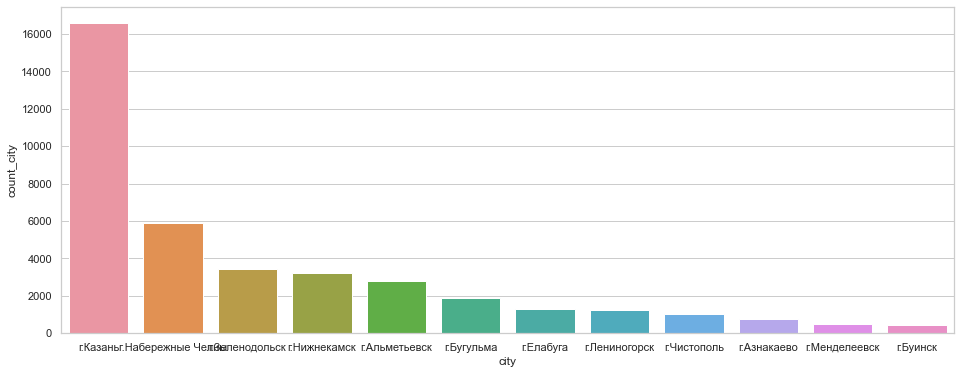

In [43]:
city_graf=sns.barplot(x="city", y="count_city",data=data_null_traf_count)

In [18]:
data_null_traf_count

In [18]:
sity_count=data['city'].value_counts().head(12)  # Аналитика по колличеству пользователей по городам

In [21]:
sity_count

г.Казань              113797
г.Набережные Челны     49408
г.Нижнекамск           27876
г.Альметьевск          22712
г.Зеленодольск         20146
г.Бугульма             14354
г.Лениногорск          11382
г.Елабуга               8381
г.Чистополь             6942
г.Азнакаево             4985
с.Ново-Шигалеево        3246
г.Нурлат                2844
Name: city, dtype: int64

<AxesSubplot:xlabel='city', ylabel='Count'>

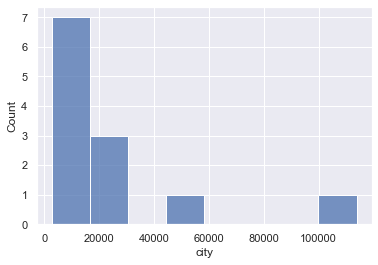

In [40]:
sns.histplot(sity_count)

In [44]:
sity_count_percent=data.city.value_counts(normalize=True).head(12)  # Аналитика по колличеству городов в %

In [45]:
sity_count_percent

г.Казань             0.356
г.Набережные Челны   0.154
г.Нижнекамск         0.087
г.Альметьевск        0.071
г.Зеленодольск       0.063
г.Бугульма           0.045
г.Лениногорск        0.036
г.Елабуга            0.026
г.Чистополь          0.022
г.Азнакаево          0.016
с.Ново-Шигалеево     0.010
г.Нурлат             0.009
Name: city, dtype: float64

In [47]:
current_status_count=data.groupby('current_status',as_index=False) \
.agg({'customer_id': 'count'}) \
.rename(columns={"customer_id":'count_status'}) \
.sort_values('count_status',ascending=False) \
.head(12)   # статистика по городам по нулевому трафику

In [48]:
current_status_count

,current_status,count_status
0,Активен,292987
1,Блокирован,16204
8,Приостановлен,6654
7,Закрыт,2382
2,Блокирован+Приостановлен,1718
3,В очереди на расторжение (А),78
4,В очереди на расторжение (Б),9
5,В очереди на расторжение (Б+П),2
6,В очереди на расторжение (П),2


In [26]:
data_filt_traf_status=data_filt_traf.query("current_status == 'Активен' & traffic_volume > 0").copy()

In [27]:
data_filt_traf_status.describe()  # информация по трафики без учета 0 трафика и не активных аккаунтов 

,customer_id,traffic_volume
count,"268,728.000","268,728.000"
mean,"1,166,894.237",46.898
std,"94,992.563",61.955
min,"1,000,156.000",0.000
25%,"1,087,017.750",9.903
50%,"1,167,930.500",28.683
75%,"1,249,197.250",61.644
max,"1,331,136.000","4,987.645"


In [21]:
sum_data_traf= data['traffic_volume'].mean()

In [22]:
sum_data_traf  # сумма всего трафика

39.46548393071907

In [30]:
sort_region_sum_traffic=data_group[['region','traffic_volume']] \
.groupby(['region'],sort = True,as_index= False) \
.sum() \
.sort_values('traffic_volume',ascending=False) \
.head(30)  # Распределие трафика по регионам 

In [31]:
sort_region_sum_traffic

,region,traffic_volume
41,г.Казань,"4,417,295.050"
42,г.Набережные Челны,"1,829,827.770"
28,Нижнекамский р-н,"1,214,670.799"
6,Альметьевский р-н,"1,033,033.551"
19,Зеленодольский р-н,"950,234.142"
12,Бугульминский р-н,"646,210.931"
23,Лениногорский р-н,"565,339.486"
17,Елабужский р-н,"315,529.275"
39,Чистопольский р-н,"265,695.169"
1,Азнакаевский р-н,"228,369.763"


<AxesSubplot:ylabel='Count'>

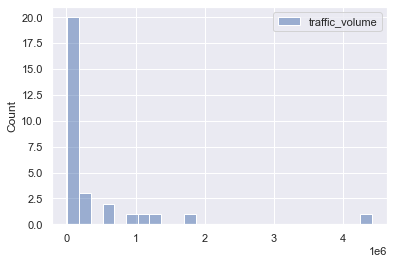

In [35]:
sns.histplot(sort_region_sum_traffic)

In [23]:
sity_id_count = data.groupby('city',as_index=False).agg({'customer_id': 'count'}) \
.rename(columns={"customer_id":'count_customer'}) \
.sort_values('count_customer',ascending=False) \
.head(12)  # Самоповтор 

In [24]:
sity_id_count

,city,count_customer
12,г.Казань,113797
19,г.Набережные Челны,49408
20,г.Нижнекамск,27876
2,г.Альметьевск,22712
10,г.Зеленодольск,20146
6,г.Бугульма,14354
15,г.Лениногорск,11382
8,г.Елабуга,8381
23,г.Чистополь,6942
1,г.Азнакаево,4985


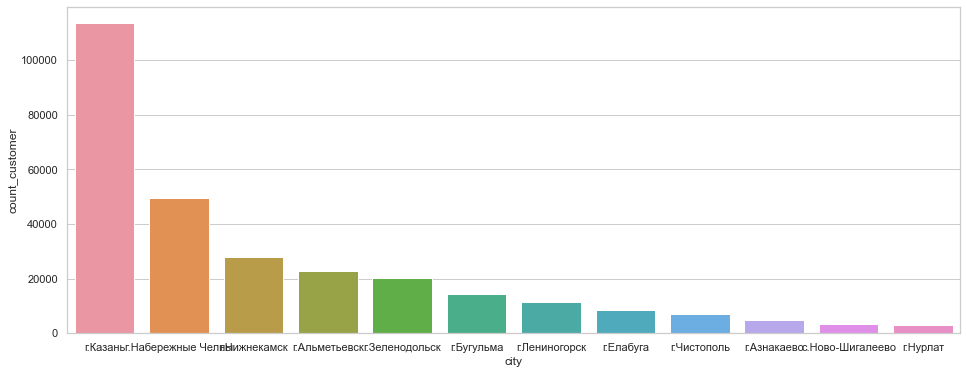

In [32]:
city_graf=sns.barplot(x="city", y="count_customer",data=sity_id_count)

In [35]:
sity_id_count.describe() 

,count_customer
count,12.000
mean,"23,839.417"
std,"31,286.588"
min,"2,844.000"
25%,"6,452.750"
50%,"12,868.000"
75%,"24,003.000"
max,"113,797.000"


In [25]:
region_id_count = data.groupby('region',as_index=False).agg({'customer_id': 'count'}) \
.rename(columns={"customer_id":'count_customer'}) \
.sort_values('count_customer',ascending=False).head(12)  # Самоповтор 

In [41]:
region_id_count

,region,customer_id
41,г.Казань,113797
42,г.Набережные Челны,49408
28,Нижнекамский р-н,30421
19,Зеленодольский р-н,23638
6,Альметьевский р-н,22821
12,Бугульминский р-н,14500
23,Лениногорский р-н,11657
17,Елабужский р-н,8381
39,Чистопольский р-н,6960
1,Азнакаевский р-н,5775


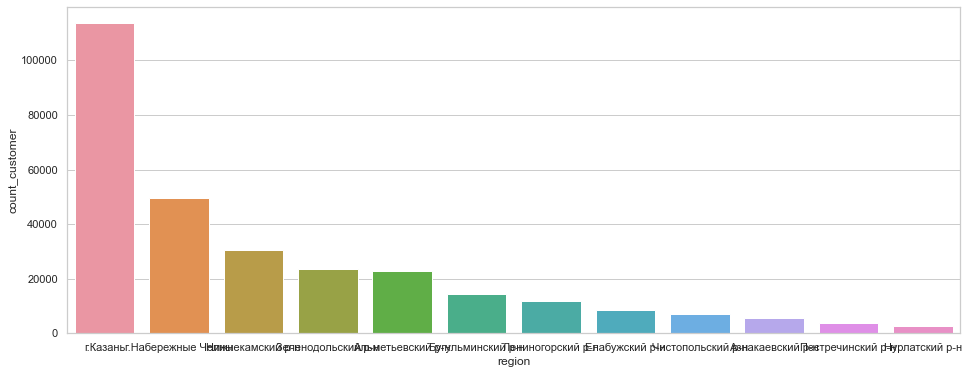

In [42]:
city_graf=sns.barplot(x="region", y="count_customer",data=region_id_count)

In [42]:
filt_date_dissolution = data.query("date_dissolution != '-'").convert_dtypes().copy()  # Отбрасываем даты растожения без значений

In [43]:
filt_date_dissolution.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382 entries, 228 to 319423
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       2382 non-null   Int64         
 1   region            2382 non-null   string        
 2   city              2382 non-null   string        
 3   date_conclusion   2382 non-null   datetime64[ns]
 4   current_status    2382 non-null   string        
 5   traffic_volume    2382 non-null   Float64       
 6   traffic_period    2382 non-null   datetime64[ns]
 7   date_dissolution  2382 non-null   string        
dtypes: Float64(1), Int64(1), datetime64[ns](2), string(4)
memory usage: 172.1 KB


In [44]:
datetime_for_dissolution=pd.to_datetime(filt_date_dissolution['date_dissolution'],dayfirst=True,infer_datetime_format=True)

In [45]:
datetime_for_dissolution

228      2020-07-08
229      2020-07-01
835      2020-07-12
1506     2020-06-26
1523     2020-07-01
            ...    
318849   2020-07-09
318932   2020-07-04
319108   2020-07-06
319402   2020-07-10
319423   2020-07-08
Name: date_dissolution, Length: 2382, dtype: datetime64[ns]

In [46]:
filt_date_dissolution_drop = filt_date_dissolution.drop('date_dissolution', 1).copy()

C:\Users\andrey\AppData\Local\Temp\ipykernel_2496\2899318722.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  filt_date_dissolution_drop = filt_date_dissolution.drop('date_dissolution', 1).copy()


In [47]:
filt_date_dissolution_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2382 entries, 228 to 319423
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      2382 non-null   Int64         
 1   region           2382 non-null   string        
 2   city             2382 non-null   string        
 3   date_conclusion  2382 non-null   datetime64[ns]
 4   current_status   2382 non-null   string        
 5   traffic_volume   2382 non-null   Float64       
 6   traffic_period   2382 non-null   datetime64[ns]
dtypes: Float64(1), Int64(1), datetime64[ns](2), string(3)
memory usage: 153.5 KB


In [48]:
filt_date_dissolution=filt_date_dissolution_drop.join(datetime_for_dissolution)

In [49]:
filt_date_dissolution

,customer_id,region,city,date_conclusion,current_status,traffic_volume,traffic_period,date_dissolution
228,1060078,г.Казань,г.Казань,2009-11-01 00:00:00,Закрыт,0.000,2018-08-01,2020-07-08
229,1060080,г.Казань,г.Казань,2009-11-01 00:00:00,Закрыт,0.000,2018-08-01,2020-07-01
835,1060927,г.Казань,г.Казань,2009-12-01 00:00:00,Закрыт,83.292,2018-08-01,2020-07-12
1506,1060928,г.Казань,г.Казань,2009-12-01 00:00:00,Закрыт,0.000,2018-08-01,2020-06-26
1523,1037554,Бугульминский р-н,г.Бугульма,2009-12-01 11:46:50,Закрыт,0.000,2018-08-01,2020-07-01
...,...,...,...,...,...,...,...,...
318849,1314847,Нурлатский р-н,г.Нурлат,2020-07-03 15:33:29,Закрыт,0.000,2018-08-01,2020-07-09
318932,1256168,Зеленодольский р-н,г.Зеленодольск,2020-07-04 10:08:39,Закрыт,0.000,2018-08-01,2020-07-04
319108,1232994,Елабужский р-н,г.Елабуга,2020-07-06 09:43:50,Закрыт,0.000,2018-08-01,2020-07-06
319402,1308588,Нижнекамский р-н,г.Нижнекамск,2020-07-07 18:01:05,Закрыт,0.000,2018-08-01,2020-07-10


In [50]:
filt_data_dissolution_stat=filt_date_dissolution.groupby(['region', pd.Grouper(key='date_dissolution', freq='M')])['traffic_volume'].sum()

In [51]:
filt_data_dissolution_stat

region                 date_dissolution
Агрызский р-н          2020-06-30             0.000
                       2020-07-31            66.662
Азнакаевский р-н       2020-07-31            76.570
Актанышский р-н        2020-07-31            22.413
Алексеевский р-н       2020-07-31             9.776
Альметьевский р-н      2020-06-30             0.000
                       2020-07-31         1,045.808
Апастовский р-н        2020-07-31             0.000
Арский р-н             2020-07-31             0.000
Бавлинский р-н         2020-07-31             4.104
Балтасинский р-н       2020-07-31             0.000
Бугульминский р-н      2020-06-30             0.000
                       2020-07-31           449.774
Буинский р-н           2020-07-31             4.065
Верхнеуслонский р-н    2020-07-31            38.020
Высокогорский р-н      2020-07-31            54.932
Дрожжановский р-н      2020-07-31             0.000
Елабужский р-н         2020-06-30             0.000
                       2

In [52]:
filt_data_dissolution_stat

region                 date_dissolution
Агрызский р-н          2020-06-30             0.000
                       2020-07-31            66.662
Азнакаевский р-н       2020-07-31            76.570
Актанышский р-н        2020-07-31            22.413
Алексеевский р-н       2020-07-31             9.776
Альметьевский р-н      2020-06-30             0.000
                       2020-07-31         1,045.808
Апастовский р-н        2020-07-31             0.000
Арский р-н             2020-07-31             0.000
Бавлинский р-н         2020-07-31             4.104
Балтасинский р-н       2020-07-31             0.000
Бугульминский р-н      2020-06-30             0.000
                       2020-07-31           449.774
Буинский р-н           2020-07-31             4.065
Верхнеуслонский р-н    2020-07-31            38.020
Высокогорский р-н      2020-07-31            54.932
Дрожжановский р-н      2020-07-31             0.000
Елабужский р-н         2020-06-30             0.000
                       2

In [56]:
data_sum=data.query("date_dissolution != '-'").agg({'traffic_volume': 'sum'})

